<b><font color="SteelBlue" size="+3">Classifiez automatiquement des biens de consommation</font></b>

# Introduction

Ce notebook est la suite de celui sur le traitement des descriptions. On récupère les données nettoyées pour les catégories des produits.

## Imports

In [1]:
# Chargement des librairies
# Standard
import os

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from matplotlib.image import imread
from PIL import Image as PilImage

# Deep Learning - TensorFlow/Keras
os.environ["KERAS_BACKEND"] = "torch"
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess_inceptionresnetv2
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet201
from tensorflow.keras.utils import to_categorical

# Custom Modules
from Deveau_Estelle_4_IMG_func_042024 import *

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_txt_faisabilite_042024.ipynb',
 'Deveau_Estelle_2_NLP_func_042024.py',
 'Deveau_Estelle_3_notebook_img_faisabilite_042024.ipynb',
 'Deveau_Estelle_4_IMG_func_042024.py',
 'Deveau_Estelle_5_notebook_img_classification_042024.ipynb',
 'model_augmented_data_best.weights.h5',
 'model_best.keras',
 'model_best.weights.h5',
 'model_densenet201_best.weights.h5',
 'model_inceptionresnetv2_best.weights.h5',
 'model_vgg16_best.weights.h5',
 'OC_projet6.pptx',
 'pythonProject',
 'svg',
 'Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb',
 'Weather_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0.ipynb',
 '__pycache__']

In [3]:
os.listdir("data/Cleaned/")

['data.csv']

In [4]:
path     = "./data/Cleaned/"
filename = "data.csv"

In [5]:
data = pd.read_csv(path + filename)

In [6]:
path     = "./data/Sources/Images/"
list_photos = [file for file in os.listdir(path)]
print(len(list_photos))

1050


# Classification supervisée

In [7]:
cols_to_keep = ['uniq_id', 'product_category']
df = data[cols_to_keep]
df.head(5)

,uniq_id,product_category
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing


In [8]:
image_paths = [f"{path}{uid}.jpg" for uid in df['uniq_id']]

# Encodage des catégories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(df['product_category'])
category_names = label_encoder.classes_

## Séparation des jeux de données (train, val, test)

In [9]:
y = to_categorical(categories_encoded, 7)

In [10]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [11]:
# Diviser les chemins d'image et les étiquettes
paths_train, paths_test, y_train, y_test = train_test_split(image_paths, y, test_size=0.2, random_state=42)
paths_train, paths_val, y_train, y_val = train_test_split(paths_train, y_train, test_size=0.25, random_state=42)

In [12]:
y_test[:5]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [13]:
# Dictionnaire pour stocker les résultats
results = {}

## Evaluation des modèles sélectionnés

In [14]:
# Définir le seuil à un niveau supérieur spécifique
PilImage.MAX_IMAGE_PIXELS = 100000000

### VGG16

In [15]:
# Préparation des données
X_train_vgg16, X_val_vgg16, X_test_vgg16 = prepare_data(paths_train, paths_val, paths_test, preprocess_vgg16,
                                                        target_size=(224, 224, 3))

In [16]:
# Création du modèle
model_vgg16 = create_model_fct(base_model_name='VGG16')

In [17]:
# Entraînement du modèle
model_vgg16, history_vgg16, duration_vgg16 = train_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16, y_val,
                                                         model_save_path="./model_vgg16_best.weights.h5")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.4001 - loss: 6.3000
Epoch 1: val_loss improved from inf to 1.33368, saving model to ./model_vgg16_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.4051 - loss: 6.2369 - val_accuracy: 0.7524 - val_loss: 1.3337
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6931 - loss: 2.4637
Epoch 2: val_loss did not improve from 1.33368
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.6936 - loss: 2.4529 - val_accuracy: 0.7619 - val_loss: 1.4077
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7731 - loss: 1.6422
Epoch 3: val_loss improved from 1.33368 to 1.28510, saving model to ./model_vgg16_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.7720 - loss: 1.6398 - val_accuracy: 0.7714 - val_loss: 1.2851
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7805 - loss: 1.1352
Epoch 4: val_loss improved from 1.28510 to 1.12720, saving model t

In [18]:
# Évaluation du modèle
loss_vgg16, accuracy_vgg16, ari_score_vgg16 = evaluate_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16,
                                                             y_val, X_test_vgg16, y_test, best_weights_path="./model_vgg16_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9964 - loss: 0.0226
Training Accuracy after last epoch: 0.9952

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8532 - loss: 0.7411
Test Accuracy after last epoch: 0.8286

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8341 - loss: 0.8008
Validation Accuracy (best): 0.8381
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8131 - loss: 0.6704
Test Accuracy (best): 0.8143
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
Adjusted Rand Index (ARI): 0.6341


### InceptionResNetV2

In [19]:
# Préparation des données
X_train_inceptionresnetv2, X_val_inceptionresnetv2, X_test_inceptionresnetv2 = prepare_data(paths_train, paths_val,
                                                                                            paths_test, preprocess_inceptionresnetv2,
                                                                                            target_size=(299, 299, 3))

In [20]:
# Création du modèle
model_inceptionresnetv2 = create_model_fct(base_model_name='InceptionResNetV2')

In [21]:
# Entraînement du modèle
model_iresnetv2, history_iressnetv2, duration_iresnetv2 = train_model(model_inceptionresnetv2, X_train_inceptionresnetv2,
                                                                      y_train, X_val_inceptionresnetv2, y_val,
                                                                      model_save_path="./model_inceptionresnetv2_best.weights.h5")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.3997 - loss: 1.8957
Epoch 1: val_loss improved from inf to 0.63741, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.4071 - loss: 1.8723 - val_accuracy: 0.8476 - val_loss: 0.6374
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.7983 - loss: 0.7093
Epoch 2: val_loss did not improve from 0.63741
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.7987 - loss: 0.7070 - val_accuracy: 0.7238 - val_loss: 0.7700
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.8393 - loss: 0.5705
Epoch 3: val_loss improved from 0.63741 to 0.48319, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.8396 - loss: 0.5693 - val_accuracy: 0.8286 - val_loss: 0.4832
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.8581 - loss: 0.4275
Epoch 4: val_loss did not improve from 0.4

In [22]:
# Évaluation du modèle
loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2 = evaluate_model(model_iresnetv2,
                                                                                                 X_train_inceptionresnetv2,
                                                                                                 y_train, X_val_inceptionresnetv2,
                                                                                                 y_val, X_test_inceptionresnetv2,
                                                                                                 y_test,
                                                                                                 best_weights_path="./model_inceptionresnetv2_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.9855 - loss: 0.0421
Training Accuracy after last epoch: 0.9857

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.8946 - loss: 0.4400
Test Accuracy after last epoch: 0.8905

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.8729 - loss: 0.3341
Validation Accuracy (best): 0.8714
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.9012 - loss: 0.4070
Test Accuracy (best): 0.8952
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
Adjusted Rand Index (ARI): 0.7907


### DenseNet201

In [23]:
# Préparation des données
X_train_densenet201, X_val_densenet201, X_test_densenet201 = prepare_data(paths_train, paths_val, paths_test,
                                                                          preprocess_densenet201, target_size=(224, 224, 3))


In [24]:
# Création du modèle
model_densenet201 = create_model_fct(base_model_name='DenseNet201')


In [25]:
# Entraînement du modèle
model_densenet201, history_densenet201, duration_densenet201 = train_model(model_densenet201, X_train_densenet201, y_train,
                                                                           X_val_densenet201, y_val,
                                                                           model_save_path="./model_densenet201_best.weights.h5")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4043 - loss: 2.0317
Epoch 1: val_loss improved from inf to 0.66266, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.4122 - loss: 2.0030 - val_accuracy: 0.7571 - val_loss: 0.6627
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8327 - loss: 0.5971
Epoch 2: val_loss improved from 0.66266 to 0.61136, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8326 - loss: 0.5962 - val_accuracy: 0.7857 - val_loss: 0.6114
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8688 - loss: 0.4207
Epoch 3: val_loss improved from 0.61136 to 0.50150, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8681 - loss: 0.4222 - val_accuracy: 0.8333 - val_loss: 0.5015
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8897 - loss: 0.3833
Epoch 4: val_lo

In [26]:
# Évaluation du modèle
loss_densenet201, accuracy_densenet201, ari_score_densenet201 = evaluate_model(model_densenet201, X_train_densenet201,
                                                                               y_train, X_val_densenet201,
                                                                                y_val, X_test_densenet201, y_test,
                                                                               best_weights_path="./model_densenet201_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9988 - loss: 0.0078
Training Accuracy after last epoch: 0.9984

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8743 - loss: 0.5096
Test Accuracy after last epoch: 0.8762

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8285 - loss: 0.5545
Validation Accuracy (best): 0.8333
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8761 - loss: 0.4591
Test Accuracy (best): 0.8762
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
Adjusted Rand Index (ARI): 0.7367


### Comparaison des résultats

In [27]:
# Initialisation de la liste pour stocker les résultats
data_results = []

# Fonction pour ajouter les résultats d'un modèle au DataFrame
def add_results(model_name, loss, accuracy, ari_score, duration):
    metrics = ['Loss', 'Accuracy', 'Adjusted Rand Score', 'Duration (en heures)']
    scores = [loss, accuracy, ari_score, (duration/3600)]
    for metric, score in zip(metrics, scores):
        data_results.append({
            'Model': model_name,
            'Metric': metric,
            'Score': score
        })

In [28]:
add_results('VGG16', loss_vgg16, accuracy_vgg16, ari_score_vgg16, duration_vgg16)
add_results('InceptionResNetV2', loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2, duration_iresnetv2)
add_results('DenseNet201', loss_densenet201, accuracy_densenet201, ari_score_densenet201, duration_densenet201)

data_metrics = pd.DataFrame(data_results)

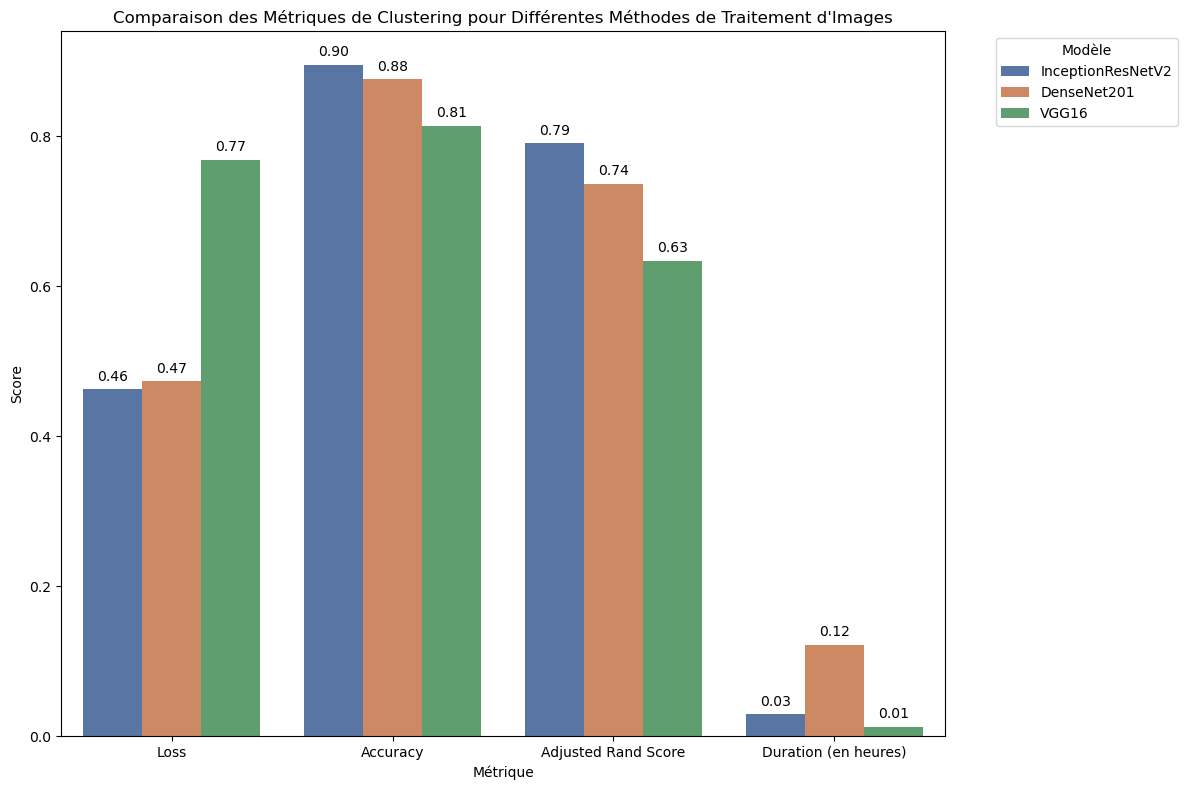

In [29]:
plot_model_performance(data_metrics)

# Optimisation

## Hyper paramètres

In [30]:
# Entraînement du modèle
best_model, duration_best = test_hyperparameters(model_inceptionresnetv2, X_train_inceptionresnetv2, y_train, X_val_inceptionresnetv2,
                                                 y_val, "./model_best.weights.h5")

Testing with learning_rate=0.01, batch_size=16, epochs=50
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 13.
Finished 0.01, 16 with val_accuracy=0.8761904835700989, duration=476.5280828475952
Testing with learning_rate=0.01, batch_size=32, epochs=50
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.
Finished 0.01, 32 with val_accuracy=0.8857142925262451, duration=64.1576497554779
Testing with learning_rate=0.01, batch_size=64, epochs=50
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Finished 0.01, 64 with val_accuracy=0.8761904835700989, duration=271.30894470214844
Testing with learning_rate=0.001, batch_size=16, epochs=50
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Finished 0.001, 16 with val_accuracy=0.8904761672019958, duration=163.75901079177856
Testing with learning_rate=0.001, batch_size=32, epochs=50
Epoch 5: early stopping
Restoring model 

In [31]:
# Évaluation du modèle
loss_best, accuracy_best, ari_score_best = evaluate_model(best_model,
                                                          X_train_inceptionresnetv2,
                                                          y_train, X_val_inceptionresnetv2,
                                                          y_val, X_test_inceptionresnetv2,
                                                          y_test, best_weights_path="none")

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8823 - loss: 0.6026
Validation Accuracy (best): 0.8810
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8971 - loss: 0.5710
Test Accuracy (best): 0.8905
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Adjusted Rand Index (ARI): 0.7766


In [32]:
add_results('InceptionResNetV2(HP)', loss_best, accuracy_best, ari_score_best, duration_best)
data_metrics = pd.DataFrame(data_results)

In [33]:
data_metrics

,Model,Metric,Score
0,VGG16,Loss,0.768992
1,VGG16,Accuracy,0.814286
2,VGG16,Adjusted Rand Score,0.634113
3,VGG16,Duration (en heures),0.012481
4,InceptionResNetV2,Loss,0.462991
5,InceptionResNetV2,Accuracy,0.895238
6,InceptionResNetV2,Adjusted Rand Score,0.790696
7,InceptionResNetV2,Duration (en heures),0.029298
8,DenseNet201,Loss,0.473116
9,DenseNet201,Accuracy,0.876190


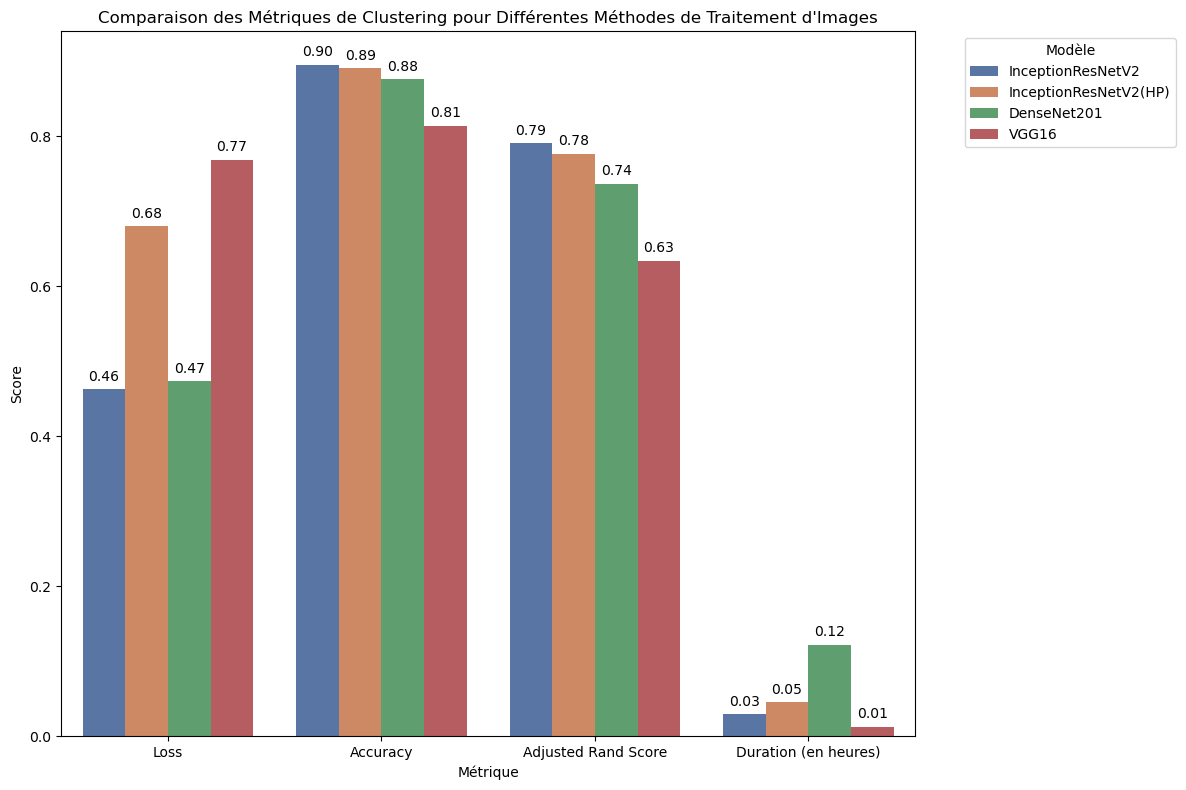

In [34]:
plot_model_performance(data_metrics)

## Data Augmentation

### ImageDataGenerator

In [44]:
# Préparez les générateurs avec la data augmentation
train_generator, validation_generator = prepare_augmented_data(X_train_inceptionresnetv2, y_train, X_val_inceptionresnetv2, y_val)


In [45]:
# Utilisation des générateurs dans l'entraînement du modèle
model_augmented_data, history_augmented_data, duration_augmented_data = train_model_augmented_data(model_inceptionresnetv2, train_generator,
                                                                                                   validation_generator,
                                                                                                   "./model_augmented_data_best.weights.h5")

C:\Users\estel\anaconda3\envs\OC\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1401 - loss: 3.3122
Epoch 1: val_loss improved from inf to 1.97624, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.1410 - loss: 3.2878 - val_accuracy: 0.1476 - val_loss: 1.9762
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1564 - loss: 2.1358
Epoch 2: val_loss improved from 1.97624 to 1.91071, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.1570 - loss: 2.1329 - val_accuracy: 0.2238 - val_loss: 1.9107
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1653 - loss: 1.9471
Epoch 3: val_loss improved from 1.91071 to 1.90999, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.1660 - loss: 1.9470 - val_accuracy: 0.2333 - val_loss: 1.9100
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1952 - loss: 1.9342
Epoch 

In [46]:
# Exemple d'appel à la fonction
loss_augmented_data, accuracy_augmented_data, ari_score_augmented_data = evaluate_model_with_generators(model_iresnetv2,
                                                                                                        train_generator,
                                                                                                        validation_generator,
                                                                                                        X_test_inceptionresnetv2,
                                                                                                        y_test,
                                                                                                        best_weights_path="./model_augmented_data_best.weights.h5"
                                                                                                       )


20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.2730 - loss: 1.7932
Training Accuracy (best): 0.2825
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3132 - loss: 1.7744
Validation Accuracy (best): 0.3095
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3750 - loss: 3.9611
Test Accuracy (best): 0.3429
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Adjusted Rand Index (ARI): 0.2452


In [47]:
add_results('InceptionResNetV2(Augmented Data)', loss_augmented_data, accuracy_augmented_data,
            ari_score_augmented_data, duration_augmented_data)
data_metrics = pd.DataFrame(data_results)

In [48]:
data_metrics

,Model,Metric,Score
0,VGG16,Loss,0.768992
1,VGG16,Accuracy,0.814286
2,VGG16,Adjusted Rand Score,0.634113
3,VGG16,Duration (en heures),0.012481
4,InceptionResNetV2,Loss,0.462991
5,InceptionResNetV2,Accuracy,0.895238
6,InceptionResNetV2,Adjusted Rand Score,0.790696
7,InceptionResNetV2,Duration (en heures),0.029298
8,DenseNet201,Loss,0.473116
9,DenseNet201,Accuracy,0.876190


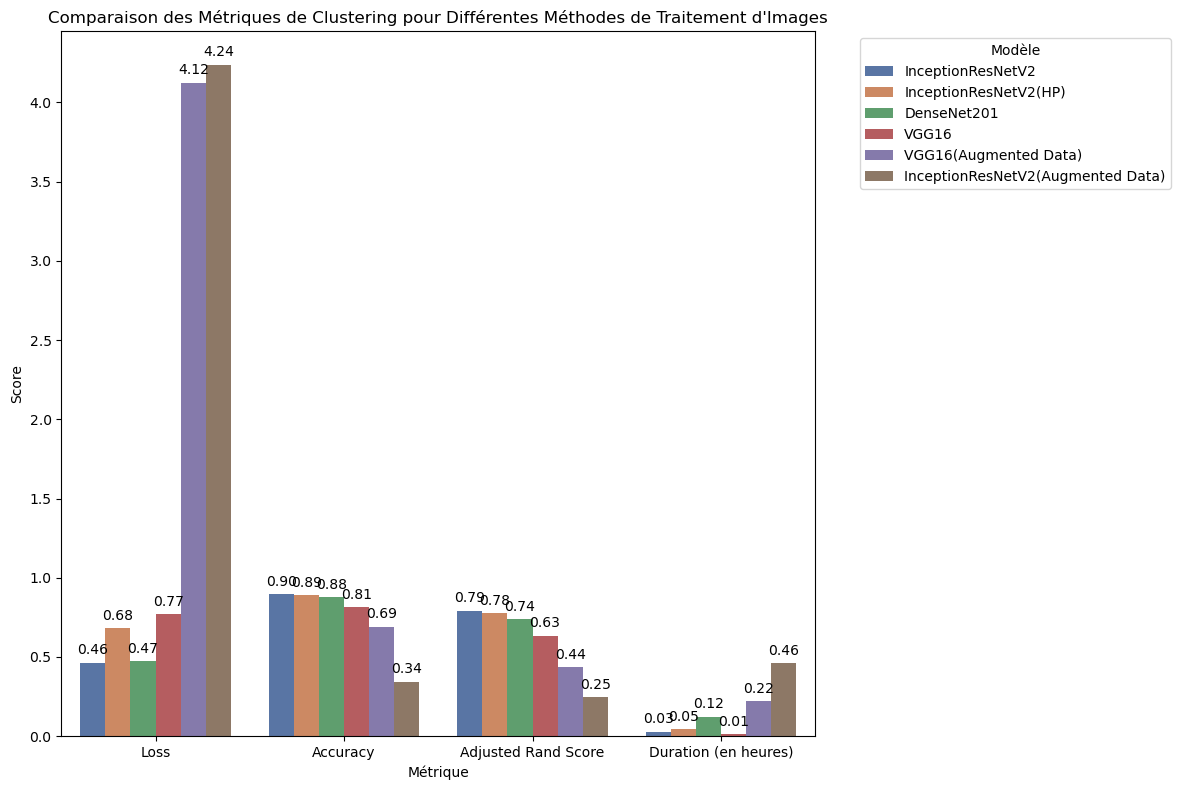

In [49]:
plot_model_performance(data_metrics)

### IA Generative